# Programming assignment 1: KNN classifier

In this programming exercise, we will build a KNN classifier and apply it to a handwritten digit dataset (MNIST). Please download the datasets from Canvas and put them in the same folder of this iPython notebook.

Instructions for submission: please submit the following:
* Completed iPython notebook. We will inspect the code and run your notebook.
* Solutions to the corresponding problems




## 1. The MNIST dataset

`MNIST` is a classic database of handwritten digits that is commonly used for training various image processing systems. The MNIST database contains 60,000 training images and 10,000 testing images. In this notebook we will work with a subset of this data: a training set of 2,000 images and a test set of 500 images. Each image is given by 28 X 28 grayscale pixels.

First, let's first load the dataset check the basic statistics.


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt 
import time
import random
from progressbar import ProgressBar

In [2]:
## Load the training set
# To speed up computation, we will just consider 2000 images for training and 500 images for testing
num_trn, num_tst = 2000,500
train_data = np.load('mnist_train_data.npy')[:num_trn,]
train_labels = np.load('mnist_train_labels.npy')[:num_trn]

## Load the testing set
test_data = np.load('mnist_test_data.npy')[:num_tst,]
test_labels = np.load('mnist_test_labels.npy')[:num_tst]


## Print out their dimensions
print("Training dataset dimensions: ", np.shape(train_data))
print("Number of training labels: ", len(train_labels))
print("Testing dataset dimensions: ", np.shape(test_data))
print("Number of testing labels: ", len(test_labels))

## Compute the number of examples of each digit
train_digits, train_counts = np.unique(train_labels, return_counts=True)
print("Training set distribution:")
print(dict(zip(train_digits, train_counts)))

test_digits, test_counts = np.unique(test_labels, return_counts=True)
print("Test set distribution:")
print(dict(zip(test_digits, test_counts)))



Training dataset dimensions:  (2000, 784)
Number of training labels:  2000
Testing dataset dimensions:  (500, 784)
Number of testing labels:  500
Training set distribution:
{0: 204, 1: 219, 2: 200, 3: 209, 4: 186, 5: 194, 6: 189, 7: 200, 8: 214, 9: 185}
Test set distribution:
{0: 49, 1: 53, 2: 63, 3: 42, 4: 49, 5: 43, 6: 42, 7: 56, 8: 48, 9: 55}


Now, let's randomly choose 10 images from the training dataset and visualize them.

[246, 429, 1453, 575, 1174, 485, 99, 1376, 310, 1513]


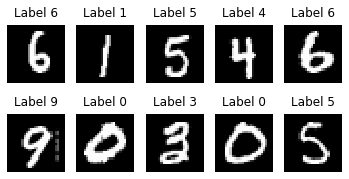

In [3]:
nrows, ncols = 2, 5
index = random.sample(range(len(train_labels)), 10)
print (index)
fig, axes = plt.subplots(nrows, ncols, figsize=(6, 3))
for i in range(nrows):
    for j in range(ncols):
        # Image index
        k = j + i * ncols
        ax = axes[i, j]
        ax.matshow((train_data[index[k],]).reshape((28,28)),cmap=plt.cm.gray)
        ax.set_axis_off()
        ax.set_title("Label " + str(train_labels[index[k]]))

## 2. KNN based on Euclidean distance

Let's first experiment with _Euclidean distance_: for two vectors $x, y \in \mathbb{R}^d$, their Euclidean distance is defined as 
$$\|x - y\| = \sqrt{\sum_{i=1}^d (x_i - y_i)^2}.$$
**Task P1:** Complete the following code section to calculate this distance. Copy the corresponding code to the problem set 1 solution pdf file.

In [4]:
## Computes squared Euclidean distance between two vectors.
def eucl_dist(x,y):
    # input:
    # x, y: vectorization of an image
    # output:
    # the euclidean distance between the two vectors
    
    ### STUDENT: YOUR CODE HERE
    return np.linalg.norm(x-y) 
    ### CODE ENDS

Now, let's try to compute the distance between some randomly chosen images.

In [5]:
index = random.sample(range(len(train_labels)), 10)
print(index)
for i in range(5):
    # Image index
    k = i * 2
    print("Distance from "+str(train_labels[index[k]])+" to "+str(train_labels[index[k+1]])+": "+
          str(eucl_dist(train_data[index[k],],train_data[index[k+1],])))

[21, 1264, 1079, 1397, 1202, 1516, 1875, 975, 329, 1291]
Distance from 2 to 3: 2031.5292
Distance from 7 to 7: 1944.8354
Distance from 5 to 3: 2960.483
Distance from 6 to 3: 2481.9517
Distance from 6 to 0: 2790.9841


Now, let's implement the K-nearest neighbor classification. 

**Task P2:** Complete the following code sections for `find_KNN` and `KNN_classifier`. Copy the corresponding code to the problem set 1 solution pdf file.

In [6]:
# Take a vector x and returns the indices of its K nearest neighbors in the training set: train_data
def find_KNN(x, train_data, train_labels, K, dist):
    # Input: 
    # x: test point
    # train_data: training data X
    # train_labels: training data labels y
    # K: number of nearest neighbors considered
    # dist: default to be the eucl_dist that you have defined above
    # Output:
    # The indices of the K nearest neighbors to test point x in the training set
    
    ##### STUDENT: Your code here #####
    distance = np.zeros(len(train_data))
    # for each train_data point indexed at i,
    # take thes the euclidian distance and array dist stores it in index i
    #dist = [||tr[0]-x|| ||tr[1]-x|| ||tr[2]-x|| ,.., ||tr[1999]-x||]   
    for i in range(len(train_data)):
        distance[i] = dist(train_data[i],x)
    #then the elements of dist are sorted in ascending way and the indexes of the first K elements are stored in m
    m = np.argsort(distance)[:K]
    return m
 
    ##### END OF CODE #####

Now, you should make use of the `find_KKN` function to define the KNN classifier.

In [7]:
# KNN classification
def KNN_classifier(x, train_data, train_labels,K,dist):
    # Input:
    # x: test point
    # train_data: training data X
    # train_labels: training data labels y
    # K: number of nearest neighbors considered
    # dist: default to be the eucl_dist that you have defined above
    # Output:
    # the predicted label of the test point
    
    ##### STUDENT: Your code here #####
    # m is the array of the indexes of training data points which have the minimum distance with test point x,(in asceding order and K of them)
    m = find_KNN(x, train_data, train_labels,K, dist)
    #if K=2, t[0]= train_labels[m[0]]=the index of training data which has the min distance with x and t[1]=train_labels[m[1]]  
    # so t[0] and t[1] will have different/same labels which may range from 0 to 9
    t = np.zeros(K)
    for i in range(K):
        t[i] = train_labels[m[i]]
    n = np.round(t).astype(np.int64)
    #count holds number of occurances of elements ranging from 0 to max(t)
    count = np.bincount(n)
    #mod returns the element which has the most occurance = mode of the dataset = label of the data point
    mod = np.argmax(count)
    return mod
    ##### END OF CODE #####

Now, let's examine how the code works for 1-NN (i.e., with K=1).

In [8]:
## Define a function that takes an index into a particular data set ("train" or "test") and displays that image.
def vis_image(index, dataset="train"):
    plt.axis('off')
    if(dataset=="train"): 
        plt.imshow((train_data[index,]).reshape((28,28)), cmap=plt.cm.gray)
        label = train_labels[index]
    else:
        plt.imshow((test_data[index,]).reshape((28,28)), cmap=plt.cm.gray)
        label = test_labels[index]
    plt.show()
    print("Label " + str(label))
    return

**Task P3: Find one example of success case and one example of failed case for 1-NN. Print the outputs and copy them to the problem set solution file.**

A success case:
1-NN classification:  0
True label:  0
The test image:


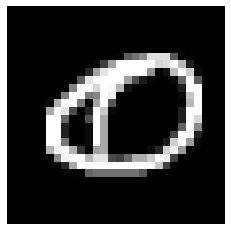

Label 0
The corresponding nearest neighbor image:


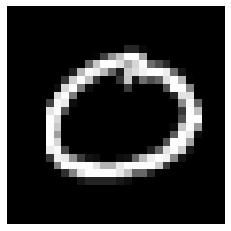

Label 0


In [9]:
## A success case:
ind_success = 0  ### STUDENT: put one index of a success case here

print("A success case:")
print("1-NN classification: ", KNN_classifier(test_data[ind_success,],train_data,train_labels,1,dist = eucl_dist))
print("True label: ", test_labels[ind_success])
print("The test image:")
vis_image(ind_success, "test")
print("The corresponding nearest neighbor image:")
vis_image(find_KNN(test_data[ind_success,],train_data,train_labels,1,eucl_dist)[0], "train")



In [10]:
## A failure cases
# loop to find the first failure index
# outputs 24 meaning the first misclassified index is 24.
test_predictions = np.zeros(len(test_labels))
for i in (range(len(test_labels))):   
    test_predictions[i] = KNN_classifier(test_data[i,],train_data,train_labels,1,eucl_dist)

for i in range(len(test_predictions)):
    if test_predictions[i] != test_labels[i]:
        print(i)
        break

24


A failed case:
1-NN classification:  9
True label:  3
The test image:


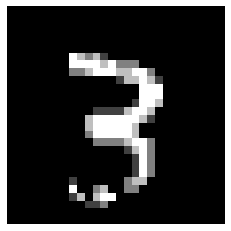

Label 3
The corresponding nearest neighbor image:


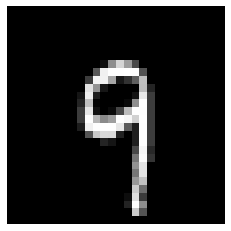

Label 9


In [11]:
## A failure case:
ind_fail = 24  ### STUDENT: put one index of a success case here

print("A failed case:")
print("1-NN classification: ", KNN_classifier(test_data[ind_fail,],train_data,train_labels,1,eucl_dist))
print("True label: ", test_labels[ind_fail])
print("The test image:")
vis_image(ind_fail, "test")
print("The corresponding nearest neighbor image:")
vis_image(find_KNN(test_data[ind_fail,],train_data,train_labels,1,eucl_dist)[0], "train")


Now let's apply our K-nearest neighbor classifier over the full data set with `K=3`. 

Note that to classify each test point, our code takes a full pass over each of the 2000 training examples. The following code takes about 8 seconds on 3.3 GHz Intel Core i. 

**Task P4: Report the outputs of the following code and copy them to the problem set solution file.**

In [12]:
### Predict on each test data point (and time it!)
pbar = ProgressBar() # to show progress
t_before = time.time()
test_predictions = np.zeros(len(test_labels))
for i in pbar(range(len(test_labels))):   
    test_predictions[i] = KNN_classifier(test_data[i,],train_data,train_labels,3,eucl_dist)
t_after = time.time()

## Compute the error
err_positions = np.not_equal(test_predictions, test_labels)
error = float(np.sum(err_positions))/len(test_labels)

print("Error of nearest neighbor classifier with Euclidean distance: ", error)
print("Classification time (seconds) with Euclidean distance: ", t_after - t_before)
#error_no=0
#for i in range(len(test_predictions)):
#    if test_predictions[i] != test_labels[i]:
#        error_no = error_no + 1
#        print(i)

100% (500 of 500) |######################| Elapsed Time: 0:00:07 Time:  0:00:07


Error of nearest neighbor classifier with Euclidean distance:  0.076
Classification time (seconds) with Euclidean distance:  7.599063158035278


In [13]:
# to find out the mislabeleded indexes in test set and the total number of mislabelled points
error_no=0
for i in range(len(test_predictions)):
    if test_predictions[i] != test_labels[i]:
        error_no = error_no + 1
        print(i)

13
17
24
47
66
88
132
138
193
197
227
233
239
252
256
260
285
300
316
320
338
357
372
377
398
406
409
425
426
429
437
442
449
453
460
472
483
498


In [14]:
error_no

38

## 3. Different distance metrics

So far, we have been using the Euclidean distance. In this section, let's try the Manhattan distance. You will also design a distance function and report the results.

Recall that the Manhattan distance (a.k.a. $\ell_1$-norm) is given by:
$$\|x - y\|_1 = {\sum_{i=1}^d |x_i - y_i|}.$$

**Task P5: Complete the definition of `manh_dist` and report the outputs of the following code and copy them to the problem set solution file.**

In [15]:
## Computes Manhattan distance between two vectors.
def manh_dist(x,y):
    # input:
    # x, y: vectorization of an image of size 28 by 28
    # output:
    # the distance between the two vectors
    
    ### STUDENT: YOUR CODE HERE
    dist = np.sum(np.abs(np.array(x)-np.array(y))) 
    return dist
    ### CODE ENDS

pbar = ProgressBar() # to show progress
## Predict on each test data point (and time it!)
t_before = time.time()
test_predictions = np.zeros(len(test_labels))
for i in pbar(range(len(test_labels))):   
    test_predictions[i] = KNN_classifier(test_data[i,],train_data,train_labels,3,dist = manh_dist)
    
t_after = time.time()

## Compute the error
err_positions = np.not_equal(test_predictions, test_labels)
error = float(np.sum(err_positions))/len(test_labels)

print("Error of nearest neighbor classifier with Manhattan distance: ", error)
print("Classification time (seconds) with Manhattan distance: ", t_after - t_before)
#error_no=0
#for i in range(len(test_predictions)):
#    if test_predictions[i] != test_labels[i]:
#        error_no = error_no + 1
#        print(i)


100% (500 of 500) |######################| Elapsed Time: 0:00:12 Time:  0:00:12


Error of nearest neighbor classifier with Manhattan distance:  0.086
Classification time (seconds) with Manhattan distance:  12.134370803833008


In [17]:
error_no=0
for i in range(len(test_predictions)):
    if test_predictions[i] != test_labels[i]:
        error_no = error_no + 1
        print(i)

17
24
47
66
88
94
132
138
193
197
227
233
239
252
256
260
268
274
285
300
316
320
326
337
338
357
362
372
377
398
406
409
425
426
429
437
442
449
453
460
472
483
498


In [16]:
error_no

38

**Task P6: Define your own distance function and write down the mathematical definition. Copy the code and the result to the problem set solution file. (2 bonus point) Can you improve over the Euclidean distance?**

In [19]:

def minkowski_distance(x, y, p = 4):
    x = np.array(x)
    y = np.array(y)
    return np.power(np.sum(np.power(np.abs(x - y), p)), 1/p)

In [20]:
pbar = ProgressBar() # to show progress
## Predict on each test data point (and time it!)
t_before = time.time()
test_predictions = np.zeros(len(test_labels))
for i in pbar(range(len(test_labels))):   
    test_predictions[i] = KNN_classifier(test_data[i,],train_data,train_labels,3,dist = minkowski_distance)

t_after = time.time()

## Compute the error
err_positions = np.not_equal(test_predictions, test_labels)
error = float(np.sum(err_positions))/len(test_labels)

print("Error of nearest neighbor classifier with the new distance: ", error)
print("Classification time (seconds) with the new distance: ", t_after - t_before)

100% (500 of 500) |######################| Elapsed Time: 0:00:29 Time:  0:00:29


Error of nearest neighbor classifier with the new distance:  0.066
Classification time (seconds) with the new distance:  29.67167067527771


## 4. Cross-validation to select K

k-Fold Cross Validation (don't confuse this k with the K in KNN!) is a very useful technique to check how well a model performs when we apply it on an independent data. It is often used to flag problems caused by overfitting and selection bias. However, it brings an additional data processing load and time.

<img style="width:500px" src="K-fold-CV.png">

**Task P7: Implement the 5-fold cross validation to choose the best K (number of nearest neighbors) between 1 and 10 for KNN with Euclidean distance. Copy the code in the solution file and plot the 5-fold validation error with respect to K. Also plot the test error on the same figure. What do you observe?**

In [21]:
### STUDENT: YOUR CODE HERE

# index array is the indexes shuffled ranging from 0 to 1999
index_array = np.arange(0, len(train_data))
np.random.shuffle(index_array)
# these shuffled indices are divided into 5 equally sized segments
folds = np.array_split(index_array, 5)
# for this iteration folds[0] is validation set and the rest is training set
#train_new_indices are the indices for new training set
train_new_indices = np.concatenate((folds[1],folds[2],folds[3],folds[4]), axis = 0) 

#new training set and training labels are created for the 5-fold validation here
train_new = []
train_new_labels = []
for j in train_new_indices:
    train_new.append(train_data[j])
    train_new_labels.append(train_labels[j]) 

#error_array0 is gonna hold the error for k = 1 to k = 10,
#meaning error_array0[0] = error for k = 1 and error_array0[9] = error for k = 10
error_array0=[]

# for different values of nearest neighbors, and folds[0] is the validation set,
# the model is trained with new training set train_new consisting from folds[1]...folds[4]
# and corresponding training labels which are train_new_labels, each prediction is saved
# to test_predictions_new[]
for k in range(1,11):
  test_predictions_new = np.zeros(len(folds[0]))
  j = 0
  for i in folds[0]:
      x = train_data[i]
      test_predictions_new[j] = KNN_classifier(x,train_new,train_new_labels,k,eucl_dist)
      j = j+1
      #print(i)

# error_no is the total number of points where the prediction is not same with 
# the actual label of the test point 
  error_no=0
  for i in range(len(test_predictions_new)):
      if test_predictions_new[i] != train_labels[folds[0][i]]:
          error_no = error_no + 1
          #print(i)
 # error_array0 holds the error for each K in KNN where folds[0] is the validation set. 
  print('k is ', k, 'error point is', error_no)
  error_array0.append(error_no/len(test_predictions_new))


k is  1 error point is 42
k is  2 error point is 44
k is  3 error point is 33
k is  4 error point is 36
k is  5 error point is 33
k is  6 error point is 31
k is  7 error point is 31
k is  8 error point is 34
k is  9 error point is 36
k is  10 error point is 36


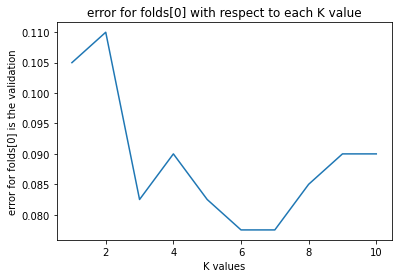

In [22]:
import matplotlib.pyplot as plt
K = [1,2,3,4,5,6,7,8,9,10]
# plot the error with respect to number of K for folds[0] is the validation set
plt.plot(K, error_array0)
plt.xlabel('K values')
plt.ylabel('error for folds[0] is the validation')
plt.title('error for folds[0] with respect to each K value')
plt.show()

In [23]:
#fold [1] is validation set

train_new_indices = np.concatenate((folds[0],folds[2],folds[3],folds[4]), axis = 0) 


train_new = []
train_new_labels = []
for j in train_new_indices:
    train_new.append(train_data[j])
    train_new_labels.append(train_labels[j]) 

error_array1=[]


for k in range(1,11):
  test_predictions_new = np.zeros(len(folds[1]))
  j = 0
  for i in folds[1]:
      x = train_data[i]
      test_predictions_new[j] = KNN_classifier(x,train_new,train_new_labels,k,eucl_dist)
      j = j+1
      #print(i)


  error_no=0
  for i in range(len(test_predictions_new)):
      if test_predictions_new[i] != train_labels[folds[1][i]]:
          error_no = error_no + 1
          #print(i)
  # error_array1 holds the error for each K in KNN where folds[1] is the validation set. 

  print('k is =', k, 'error point is', error_no)
  error_array1.append(error_no/len(test_predictions_new))

k is = 1 error point is 48
k is = 2 error point is 62
k is = 3 error point is 52
k is = 4 error point is 49
k is = 5 error point is 50
k is = 6 error point is 46
k is = 7 error point is 47
k is = 8 error point is 48
k is = 9 error point is 50
k is = 10 error point is 50


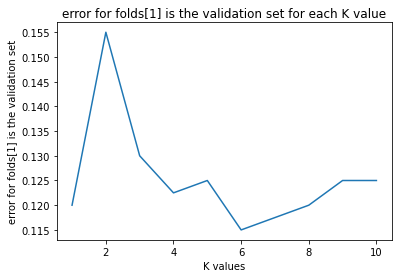

In [24]:
#import matplotlib.pyplot as plt


plt.plot(K, error_array1)
plt.xlabel('K values')
plt.ylabel('error for folds[1] is the validation set')
plt.title('error for folds[1] is the validation set for each K value')
plt.show()

In [ ]:
#folds[2] is validation set


train_new_indices = np.concatenate((folds[0],folds[1],folds[3],folds[4]), axis = 0) 


train_new = []
train_new_labels = []
for j in train_new_indices:
    train_new.append(train_data[j])
    train_new_labels.append(train_labels[j]) 

error_array2=[]

for k in range(1,11):
  test_predictions_new = np.zeros(len(folds[2]))
  j = 0
  for i in folds[2]:
      x = train_data[i]
      test_predictions_new[j] = KNN_classifier(x,train_new,train_new_labels,k,eucl_dist)
      j = j+1
      #print(i)


  error_no=0
  for i in range(len(test_predictions_new)):
      if test_predictions_new[i] != train_labels[folds[2][i]]:
          error_no = error_no + 1
          #print(i)
  # error_array2 holds the error for each K in KNN where folds[2] is the validation set. 

  print('k is =', k, 'error point is', error_no)
  error_array2.append(error_no/len(test_predictions_new))

k is = 1 error point is 40
k is = 2 error point is 45
k is = 3 error point is 41
k is = 4 error point is 38


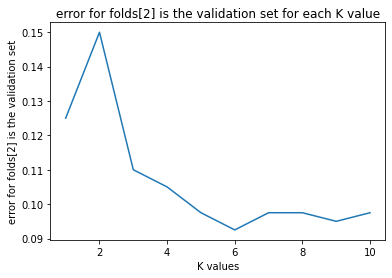

In [31]:
plt.plot(K, error_array2)
plt.xlabel('K values')
plt.ylabel('error for folds[2] is the validation set')
plt.title('error for folds[2] is the validation set for each K value')
plt.show()

In [32]:
#folds[3] is validation set

train_new_indices = np.concatenate((folds[0],folds[1],folds[2],folds[4]), axis = 0) 


train_new = []
train_new_labels = []
for j in train_new_indices:
    train_new.append(train_data[j])
    train_new_labels.append(train_labels[j]) 

error_array3=[]

for k in range(1,11):
  test_predictions_new = np.zeros(len(folds[3]))
  j = 0
  for i in folds[3]:
      x = train_data[i]
      test_predictions_new[j] = KNN_classifier(x,train_new,train_new_labels,k,eucl_dist)
      j = j+1
      #print(i)


  error_no=0
  for i in range(len(test_predictions_new)):
      if test_predictions_new[i] != train_labels[folds[3][i]]:
          error_no = error_no + 1
          #print(i)
  
  # error_array3 holds the error for each K in KNN where folds[3] is the validation set. 
  print('k is =', k, 'error point is', error_no)
  error_array3.append(error_no/len(test_predictions_new))

k is = 1 error point is 41
k is = 2 error point is 49
k is = 3 error point is 41
k is = 4 error point is 35
k is = 5 error point is 37
k is = 6 error point is 41
k is = 7 error point is 37
k is = 8 error point is 43
k is = 9 error point is 37
k is = 10 error point is 38


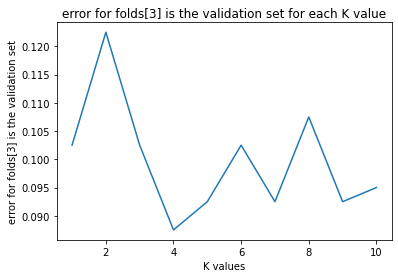

In [33]:
plt.plot(K, error_array3)
plt.xlabel('K values')
plt.ylabel('error for folds[3] is the validation set')
plt.title('error for folds[3] is the validation set for each K value')
plt.show()

In [34]:
#folds[4] is validation set

train_new_indices = np.concatenate((folds[0],folds[1],folds[2],folds[3]), axis = 0) 


train_new = []
train_new_labels = []
for j in train_new_indices:
    train_new.append(train_data[j])
    train_new_labels.append(train_labels[j]) 

error_array4=[]

for k in range(1,11):
  test_predictions_new = np.zeros(len(folds[4]))
  j = 0
  for i in folds[4]:
      x = train_data[i]
      test_predictions_new[j] = KNN_classifier(x,train_new,train_new_labels,k,eucl_dist)
      j = j+1
      #print(i)

  error_no=0
  for i in range(len(test_predictions_new)):
      if test_predictions_new[i] != train_labels[folds[4][i]]:
          error_no = error_no + 1
          #print(i)
  
  # error_array4 holds the error for each K in KNN where folds[4] is the validation set. 
  print('k is =', k, 'error point is', error_no)
  error_array4.append(error_no/len(test_predictions_new))

k is = 1 error point is 40
k is = 2 error point is 45
k is = 3 error point is 38
k is = 4 error point is 37
k is = 5 error point is 37
k is = 6 error point is 41
k is = 7 error point is 40
k is = 8 error point is 40
k is = 9 error point is 43
k is = 10 error point is 47


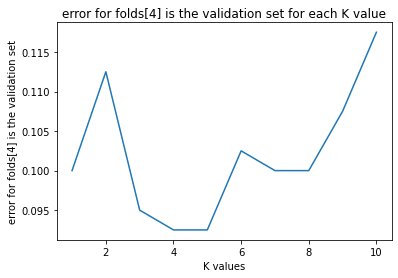

In [35]:
plt.plot(K, error_array4)
plt.xlabel('K values')
plt.ylabel('error for folds[4] is the validation set')
plt.title('error for folds[4] is the validation set for each K value')
plt.show()

In [36]:
# the average 5-folds error 
error_average=[]
for i in range(10):
  av= (error_array0[i] + error_array1[i] + error_array2[i] + error_array3[i] + error_array4[i])/5
  error_average.append(av)


In [37]:
error_average

[0.1095,
 0.1325,
 0.1035,
 0.099,
 0.0995,
 0.10499999999999998,
 0.10300000000000001,
 0.1065,
 0.10650000000000001,
 0.11299999999999999]

In [38]:
K = [1,2,3,4,5,6,7,8,9,10]

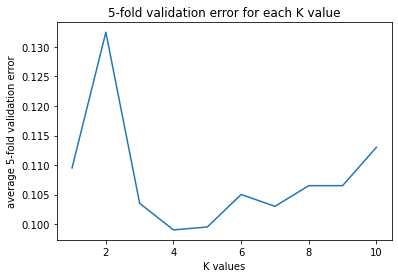

In [39]:
#import matplotlib.pyplot as plt


plt.plot(K, error_average)
plt.xlabel('K values')
plt.ylabel('average 5-fold validation error')
plt.title('5-fold validation error for each K value')
plt.show()

In [40]:

#test set is used for different k's 

error_test = []
for k in range(1,11):
  test_predictions_new = np.zeros(len(test_labels))
  j = 0
  for i in test_data:
      test_predictions[j] = KNN_classifier(i,train_data,train_labels,k,eucl_dist)
      j = j+1
      #print(i)

  error_no=0
  for i in range(len(test_predictions)):
      if test_predictions[i] != test_labels[i]:
          error_no = error_no + 1
          #print(i)
  
  print('k is =', k, 'error point is', error_no)
  error_test.append(error_no/len(test_predictions))


k is = 1 error point is 45
k is = 2 error point is 52
k is = 3 error point is 38
k is = 4 error point is 38
k is = 5 error point is 38
k is = 6 error point is 37
k is = 7 error point is 39
k is = 8 error point is 36
k is = 9 error point is 38
k is = 10 error point is 38


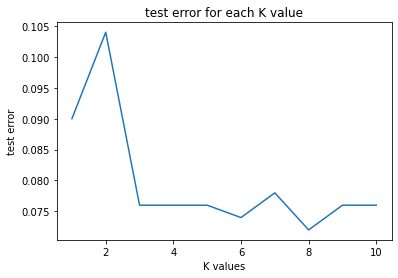

In [41]:
#test error is plotted for each k
plt.plot(K, error_test)
plt.xlabel('K values')
plt.ylabel('test error')
plt.title('test error for each K value')
plt.show()

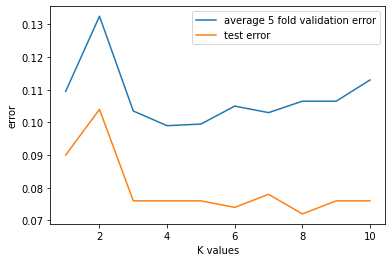

In [44]:
# plot the average 5 fold validation error and test error on same graph
fig, ax = plt.subplots()
ax.plot(K, error_average , label='average 5 fold validation error')
ax.plot(K, error_test , label='test error')
ax.set_xlabel('K values')
ax.set_ylabel('error')

ax.legend()

plt.show()

Congratulations! You have just implemented the KNN algorithm and tested it on the MNIST dataset!